# Endemo 2 - Useful Energy Demand Model Rework

## Create Input Manager

In [1]:
import pandas as pd

import input
import sector
import utility as uty

# create input manager to read all input
input_manager = input.Input()
target_year = input_manager.ctrl.general_settings.target_year

# check if the right things were read
# print(uty.str_dict(input_manager.industry_input.active_products))

Input was successfully read.


## Fill countries with information

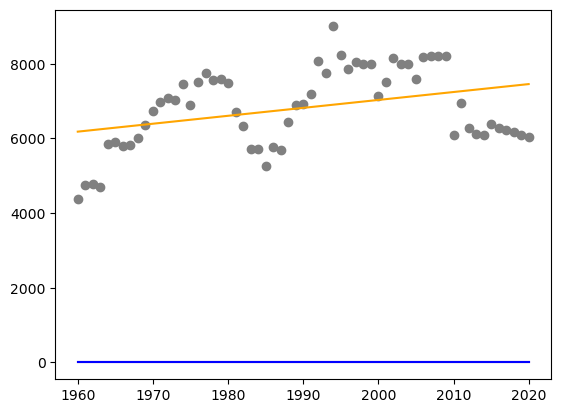

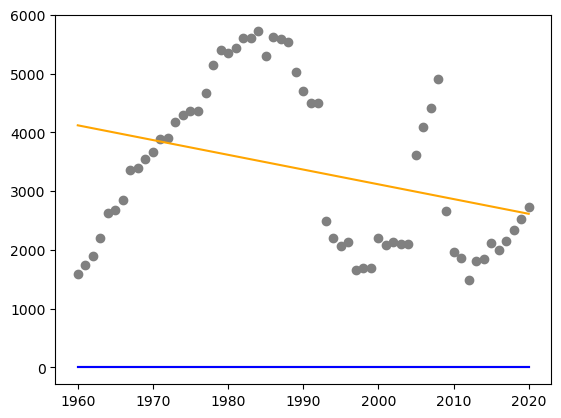

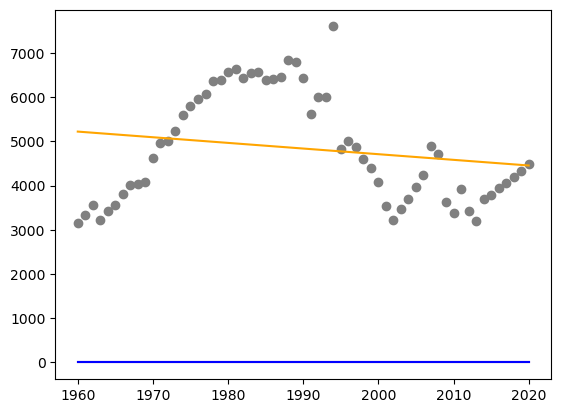

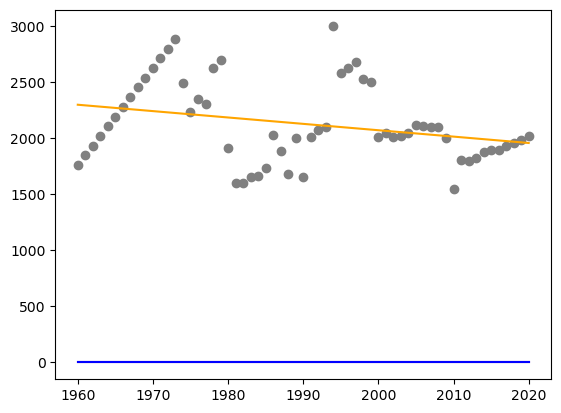

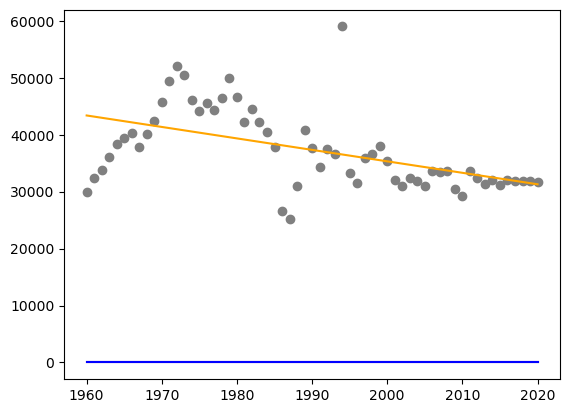

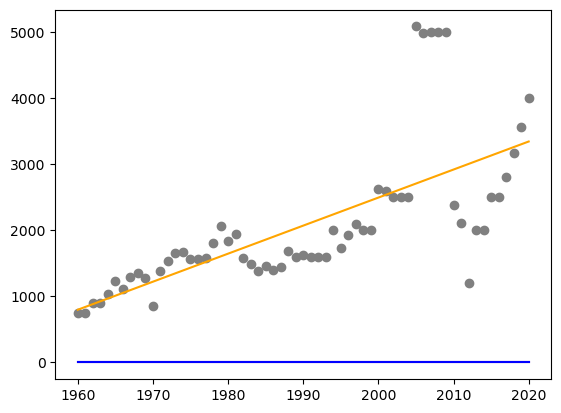

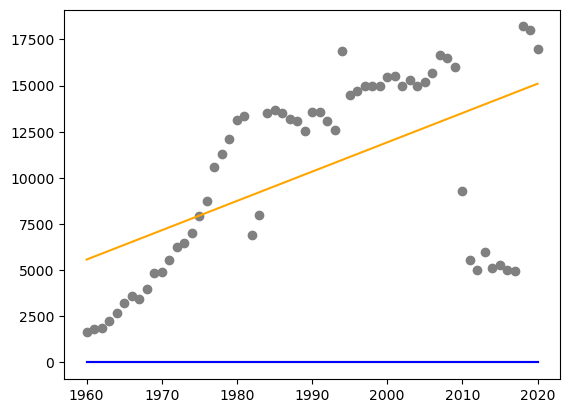

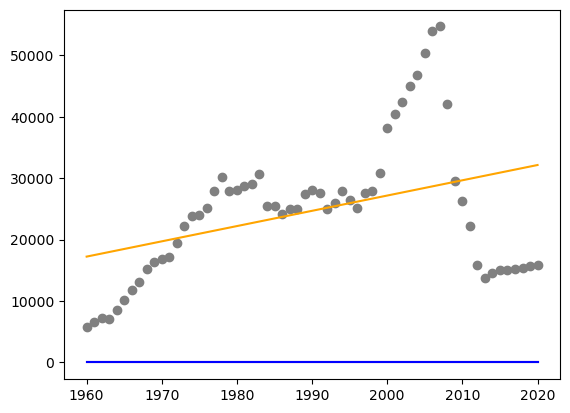

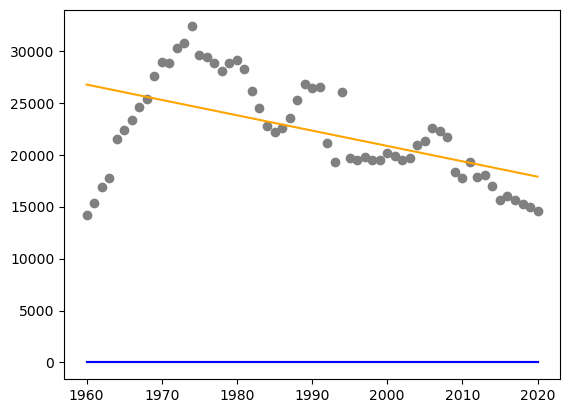

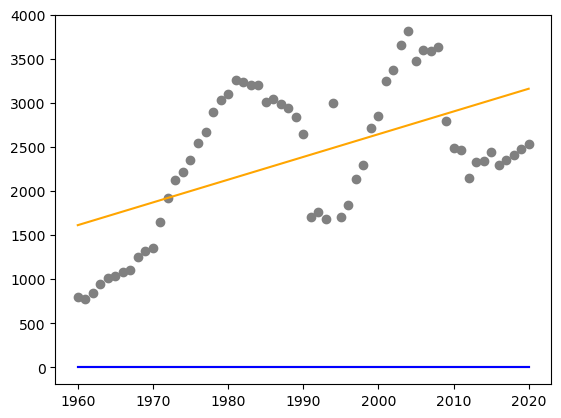

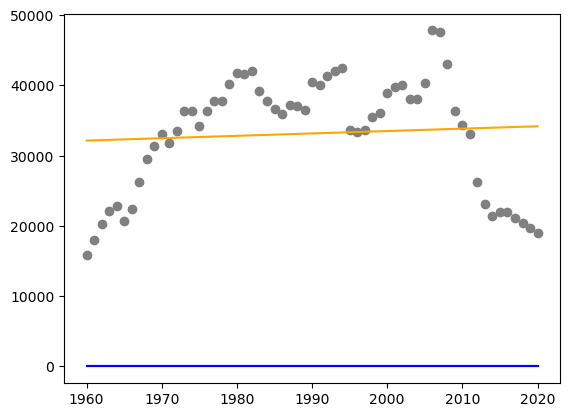

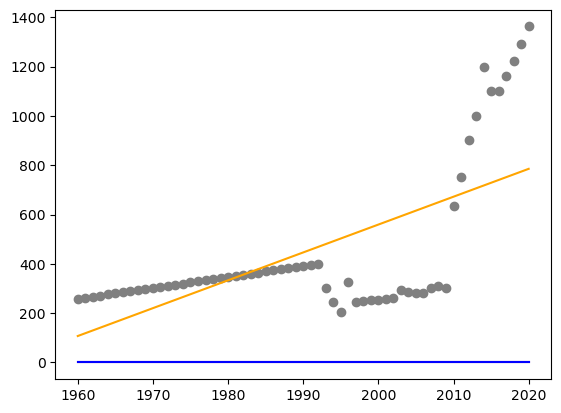

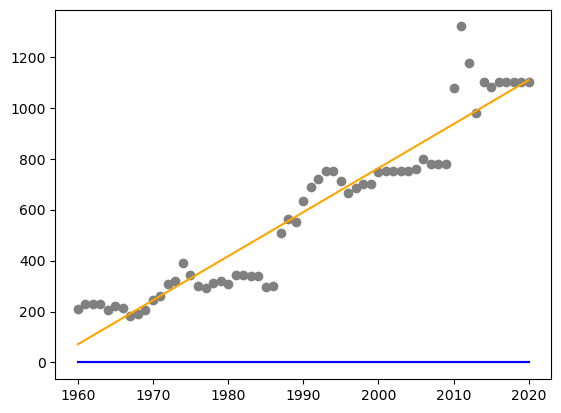

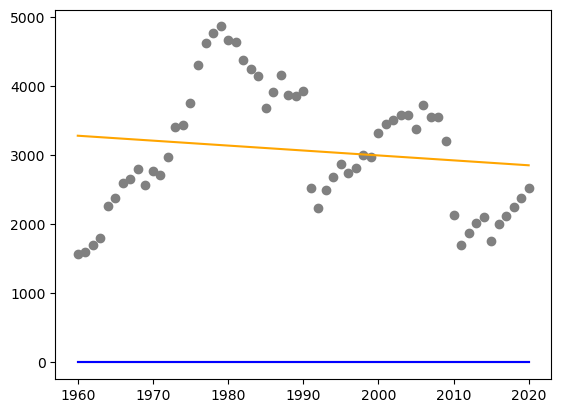

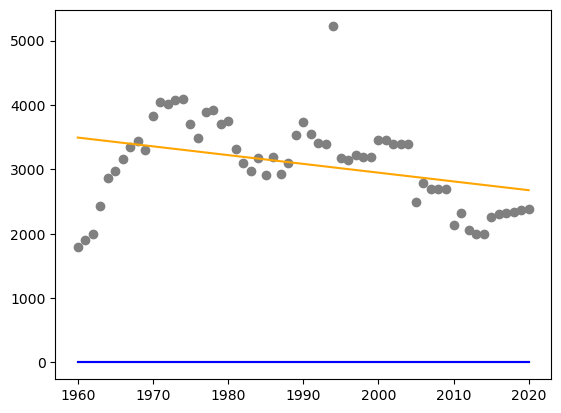

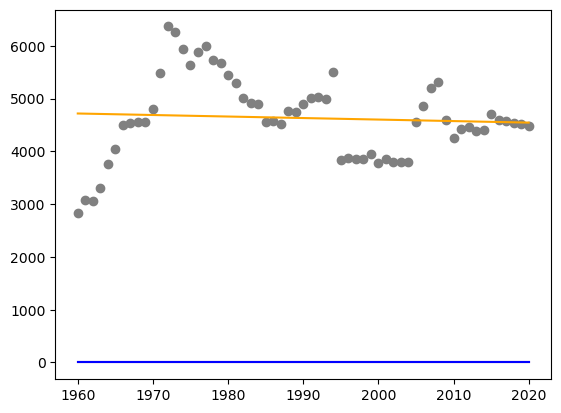

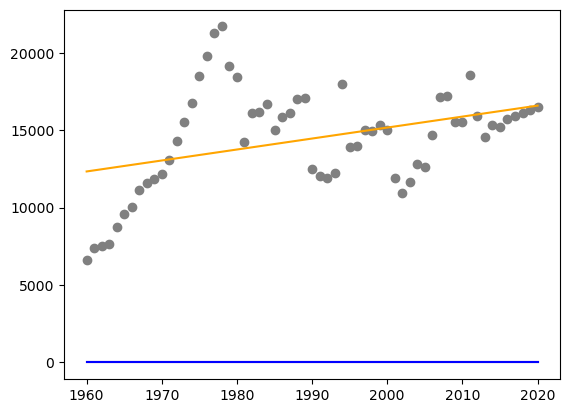

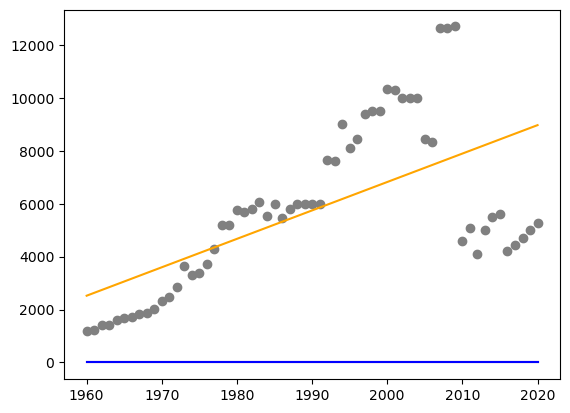

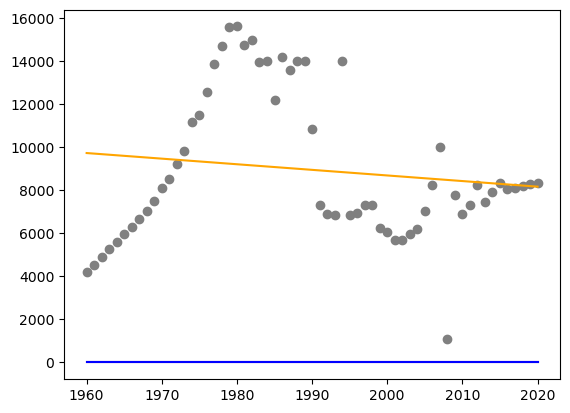

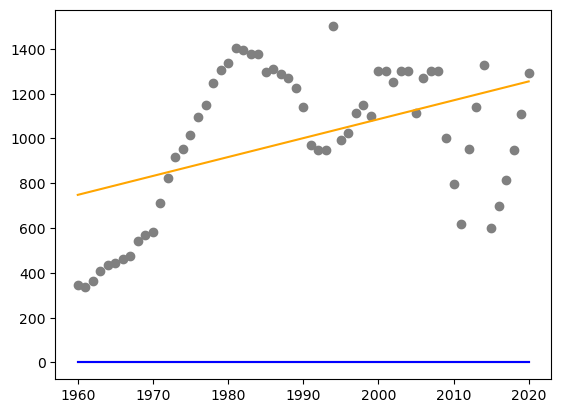

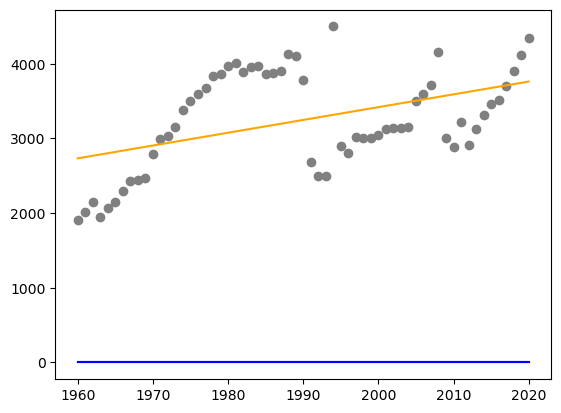

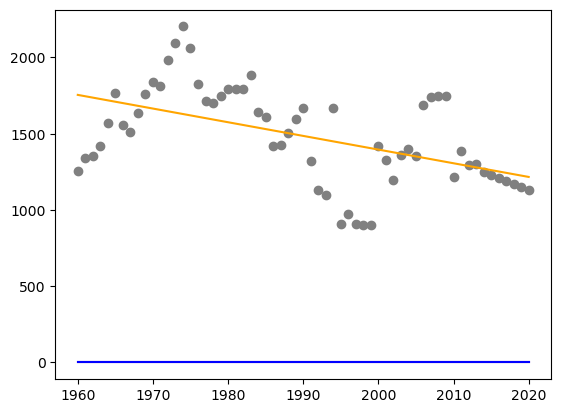

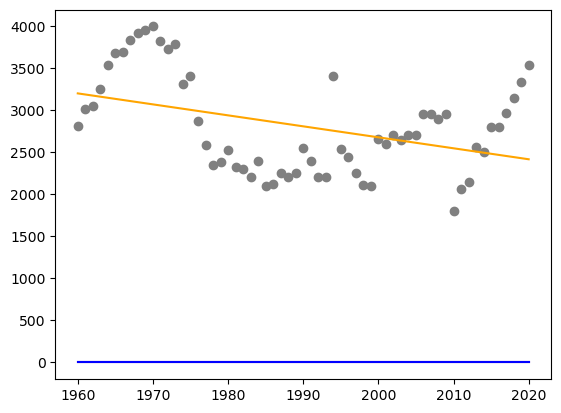

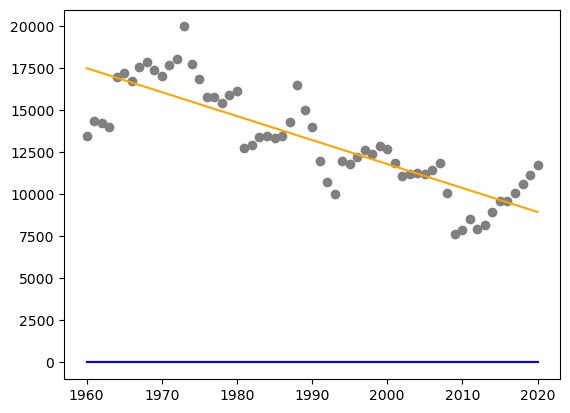

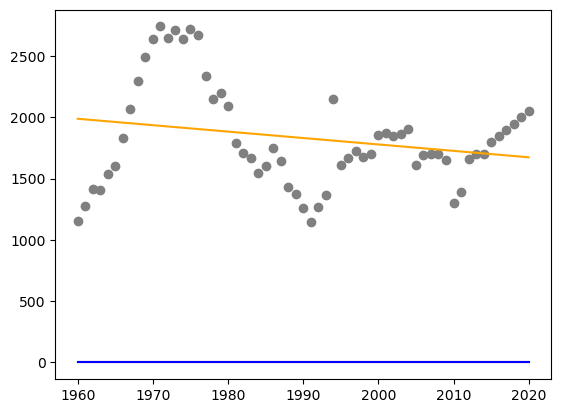

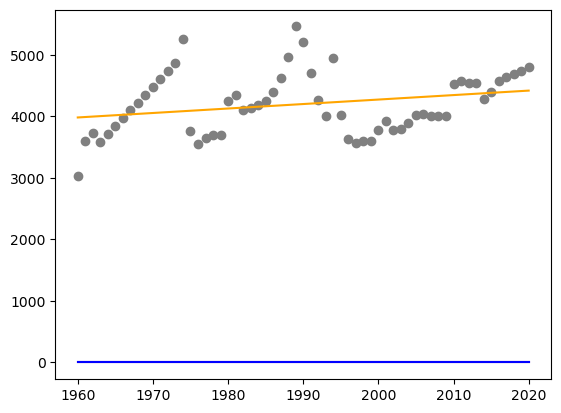

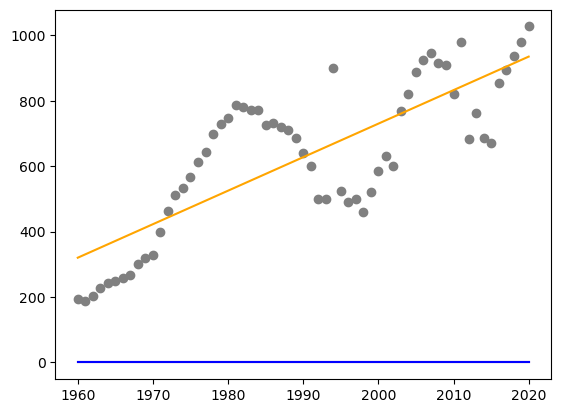

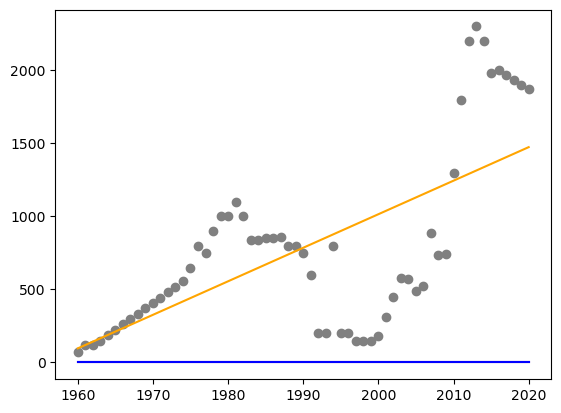

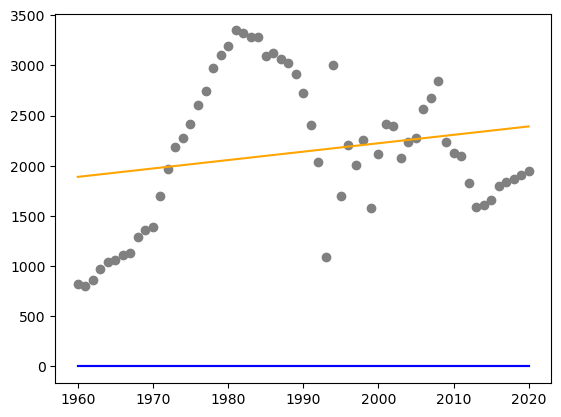

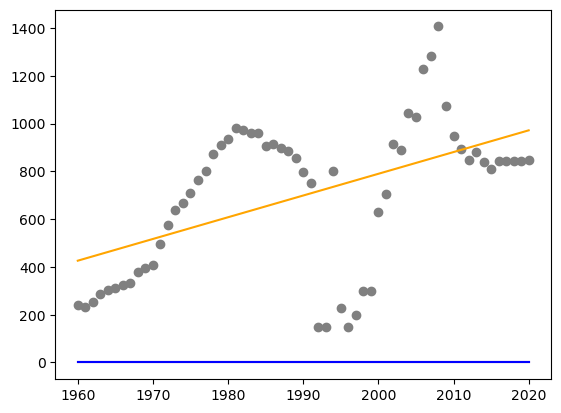

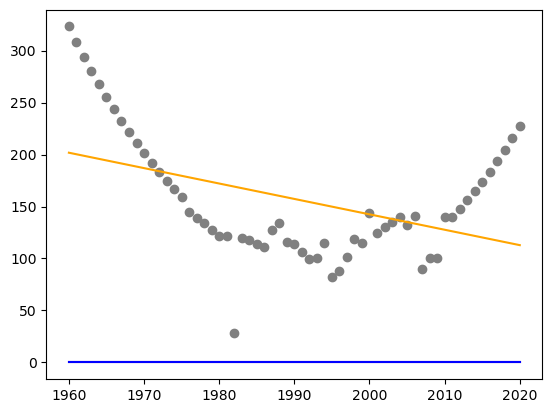

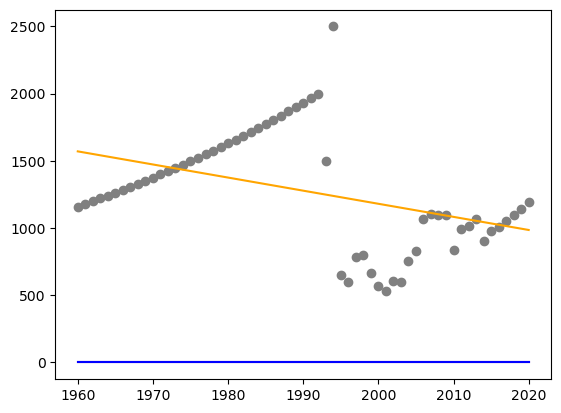

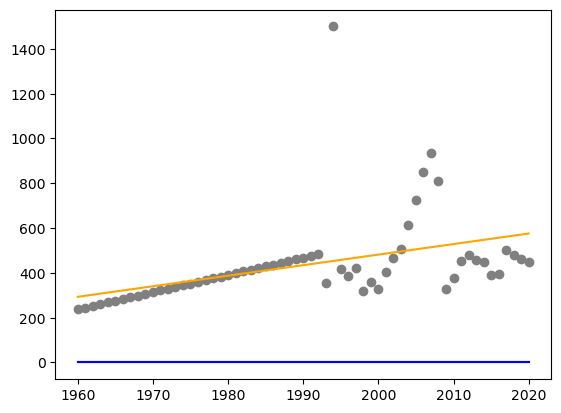

All active countries were successfully filled with data.


In [2]:
import country as cty

countries = []

for country_name in input_manager.ctrl.general_settings.active_countries:
    countries.append(cty.Country(country_name, input_manager))

print("All active countries were successfully filled with data.")

## Generate output

In [3]:
import os

if not os.path.exists(input_manager.output_path):
    os.makedirs(input_manager.output_path)
    print("Created folder " + str(input_manager.output_path))

### Gdp Prognosis Output

In [4]:
gdp_out_file_path = input_manager.output_path / ("endemo2_gdp_projections_" + str(target_year) + ".xlsx")

dict_gdp_out = {"Country": [], str(target_year): []}

for country in countries:
    dict_gdp_out["Country"].append(country.get_name())
    dict_gdp_out[str(target_year)].append(country.get_gdp().get_prog(target_year))

df_gdp_out = pd.DataFrame(dict_gdp_out)
df_gdp_out.to_excel(gdp_out_file_path, index=False, sheet_name="Prognosis")

print("GDP prognosis for year " + str(target_year) + " was successfully written to " + str(gdp_out_file_path))

GDP prognosis for year 2018 was successfully written to C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\output\endemo2_gdp_projections_2018.xlsx


### Amount Prognosis Output

In [5]:
from pandas import ExcelWriter

# TODO: why is this wrong

amount_out_file_path = input_manager.output_path / ("endemo2_amount_projections_" + str(target_year) + ".xlsx")

with pd.ExcelWriter(amount_out_file_path) as excel_writer:
    for product_name, product_obj in input_manager.industry_input.active_products.items():
        sheet_name = product_name
        dict_amount_out = {"Country": [], "Amount [kt]": []}
        for country in countries:
            dict_amount_out["Country"].append(country.get_name())
            dict_amount_out["Amount [kt]"].append(country.get_sector(sector.SectorIdentifier.INDUSTRY).prog_product_amount(product_name, target_year))
        df_amount_out = pd.DataFrame(dict_amount_out)
        df_amount_out.to_excel(excel_writer, index=False, sheet_name=sheet_name, float_format="%.5f")

print("Product prognosis for year " + str(target_year) + " was successfully written to " + str(amount_out_file_path))


Product prognosis for year 2018 was successfully written to C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\output\endemo2_amount_projections_2018.xlsx


In [6]:
print(input_manager.industry_input.active_products.items())

dict_items([('steel_prim', <input.IndustryInput.ProductInput object at 0x000002C09ACCE950>), ('steel_sec', <input.IndustryInput.ProductInput object at 0x000002C09ACCD450>), ('alu_prim', <input.IndustryInput.ProductInput object at 0x000002C09BFC6E00>), ('alu_sec', <input.IndustryInput.ProductInput object at 0x000002C09AC9CFA0>), ('copper_prim', <input.IndustryInput.ProductInput object at 0x000002C09A6D6920>), ('copper_sec', <input.IndustryInput.ProductInput object at 0x000002C09A6D7F70>), ('chlorine', <input.IndustryInput.ProductInput object at 0x000002C09AC51AB0>), ('ammonia_classic', <input.IndustryInput.ProductInput object at 0x000002C09A6D7EE0>), ('methanol_classic', <input.IndustryInput.ProductInput object at 0x000002C09C2FF250>), ('ethylene_classic', <input.IndustryInput.ProductInput object at 0x000002C097544C70>), ('propylene_classic', <input.IndustryInput.ProductInput object at 0x000002C09AC9D930>), ('aromate_classic', <input.IndustryInput.ProductInput object at 0x000002C09AC51C

## Test Utility functions
### Test Regression

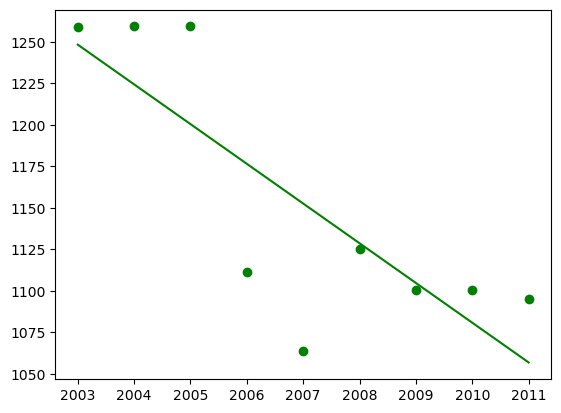

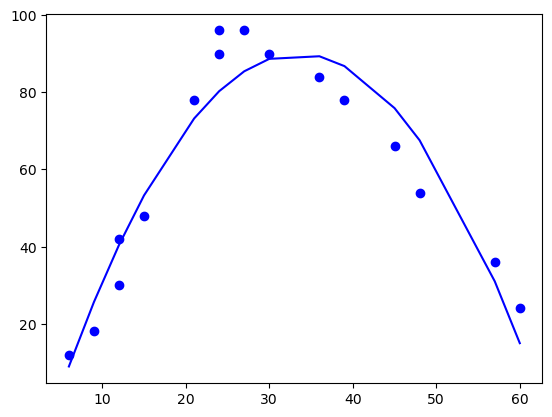

(-30.25286763906007, 7.173061390898329, -0.10698871880667692)

In [7]:
import utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [8]:
import numpy as np
import math
import utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_nan_and_inf(data)

[(6.0, 12.0),
 (12.0, 42.0),
 (15.0, 48.0),
 (21.0, 78.0),
 (24.0, 90.0),
 (24.0, 96.0),
 (27.0, 96.0),
 (30.0, 90.0),
 (36.0, 84.0),
 (39.0, 78.0),
 (45.0, 66.0),
 (48.0, 54.0),
 (57.0, 36.0),
 (60.0, 24.0)]

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [9]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


[(200, 2000), (300, 3000), (500, 5000)]
[(200, 2000), (300, 3000), (500, 5000)]


C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\utility.py:156: UserWarning: Are you sure, that your data on x axis is not ascending?
  warnings.warn("Are you sure, that your data on x axis is not ascending?")


### Zip on X explained

In [10]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(list(uty.zip_on_x(a, b)))

[((2, 200), (2, 2000)), ((3, 300), (3, 3000)), ((5, 500), (5, 5000))]


In [11]:
import utility as uty

amount = [(1998, 10), (2001, 12), (2003, 11), (2006, 13)]
population = [(2000, 10000), (2001, 11000), (2002, 12000), (2003, 13000), (2004, 14000), (2005, 14000), (2006, 15000)]
gdp = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]

zip_amount_pop = list(uty.zip_on_x(amount, population))

print("zipped amount & population: " + str(zip_amount_pop))
print("Transformed amount to per capita: " + str(list(map(lambda arg: (arg[0][0], arg[0][1] / arg[1][1]), zip_amount_pop))))

zipped amount & population: [((2001, 12), (2001, 11000)), ((2003, 11), (2003, 13000)), ((2006, 13), (2006, 15000))]
Transformed amount to per capita: [(2001, 0.001090909090909091), (2003, 0.0008461538461538462), (2006, 0.0008666666666666666)]
